# Lab 4: The Pi-Mu-e Experiment

Kollin Schultz, Justin Houle

# Abstract



# Introduction



# Methods



Populating the interactive namespace from numpy and matplotlib


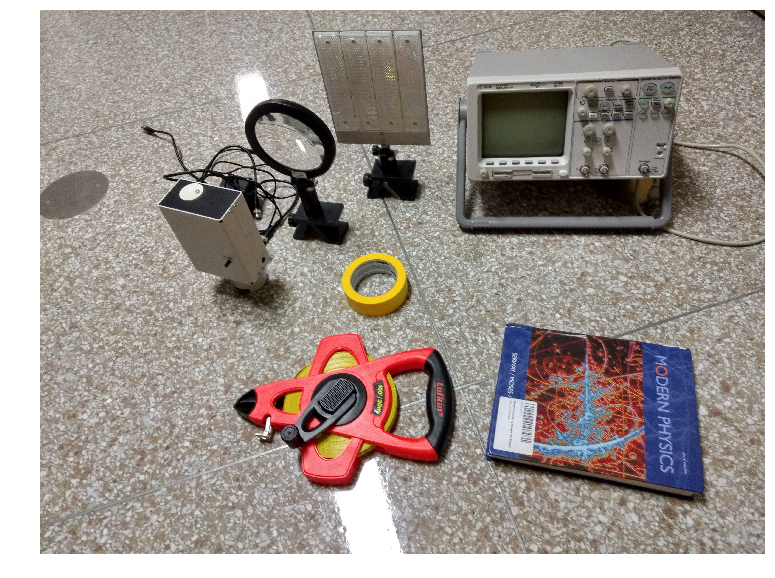

Lab Equipment used (1)


In [48]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('lab_equipment.jpg')
plt.figure(figsize=(20,10))
plt.axis('off')
imgplot = plt.imshow(img)
plt.show()

print("Lab Equipment used (1)")

# Results and Analysis



In [44]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
data=ascii.read('data.csv')

B=8800
c=1 #2.998*(10**8)
e=3*10**-4 
rho=0.07 
R=13.9 #np.average(data['radius']) #/0.785))
L=(np.average(data['length']/0.785)) 
m=(3*e*R*B)/(c) 
T=(2.1*m*(c**2)*rho*L)**(1/2) 
p=np.sqrt((T**2)+(2*T*m*(c**2)))/c
mp=(np.sqrt(((p*c)**2)+((m*(c**2))**2))+(p*c)) 
print(m)
print(mp)
print(L)




110.08800000000002
146.769664374
1.29839316734


/Users/kollinschultz/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  # This is added back by InteractiveShellApp.init_path()


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy.optimize import curve_fit

data= ascii.read('exp_data.csv')

plt.hist('data')


FileNotFoundError: [Errno 2] No such file or directory: 'exp_data.csv'

# Conclusion



# Acknowledgements

